In [1]:
import nltk
from nltk.corpus import names
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## 8
Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters
are more frequent for males vs. females (cf. 4.4).

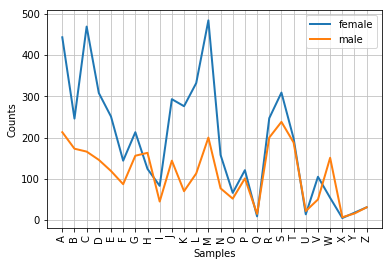

In [3]:
name = [(fileid[:-4], word[0]) for fileid in names.fileids() for word in names.words(fileid)]
cfd_name = nltk.ConditionalFreqDist(name)
cfd_name.plot()

## 9
Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as monstrous in
Moby Dick and in Sense and Sensibility?

In [6]:
word1 = [w.lower() for w in text1]
word2 = [w.lower() for w in text2]

print("Vocabulary Richness of Moby Dick: ", len(set(word1))/len(word1) * 100)
print("Vocabulary Richness of Sense and Sensibility: ", len(set(word2))/len(word2) * 100)

Vocabulary Richness of Moby Dick:  6.606497226045649
Vocabulary Richness of Sense and Sensibility:  4.522659207775329


In [8]:
text1.concordance('monstrous')
print("\n")
text2.concordance('monstrous')

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." 

## 11
Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [9]:
from nltk.corpus import brown

In [13]:
modals = ['can', 'could', 'may', 'might', 'must', 'will', 'would', 'should']
whs = ['who', 'when', 'why', 'where', 'what', 'how']

cfd_modal = nltk.ConditionalFreqDist([(category, word.lower()) for category in brown.categories()\
                                      for fileid in brown.fileids(categories=category)\
                                     for word in brown.words(fileid) if word.lower() in modals])
cfd_wh = nltk.ConditionalFreqDist([(category, word.lower()) for category in brown.categories()\
                                      for fileid in brown.fileids(categories=category)\
                                     for word in brown.words(fileid) if word.lower() in whs])

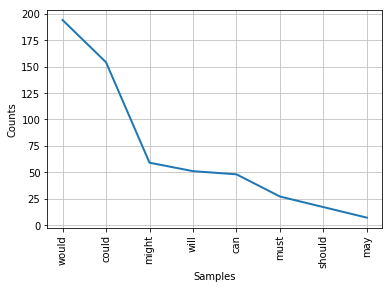

In [20]:
cfd_modal.plot()

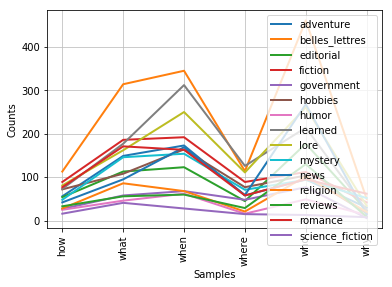

In [15]:
cfd_wh.plot()

## 12
The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

In [21]:
from nltk.corpus import cmudict

In [22]:
entries = cmudict.entries()
words = [entry[0] for entry in entries]
distinct_words = set(words)

In [27]:
print("# of words: ", len(words))
print("# of distinct words: ", len(distinct_words))

# of words:  133737
# of distinct words:  123455


## 13
What percentage of noun synsets have no hyponyms? You can get all noun synsets using 
wn.all_synsets('n') 

In [28]:
from nltk.corpus import wordnet as wn

In [30]:
noun_wo_hypo = [w for w in wn.all_synsets('n') if len(w.hyponyms()) == 0]
print("{:.2%} of noun synsets have no hyponyms".format(len(noun_wo_hypo)/len(list(wn.all_synsets('n')))))

79.67% of noun synsets have no hyponyms


## 14
Define a function supergloss(s) that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of s , and the definitions of all the hypernyms and hyponyms of s .

In [33]:
def supergloss(s):
    target = [s] + s.hypernyms() + s.hyponyms()
    return ' '.join([synset.definition() for synset in target])

In [34]:
supergloss(wn.synset('car.n.01'))

"a motor vehicle with four wheels; usually propelled by an internal combustion engine a self-propelled wheeled vehicle that does not run on rails a vehicle that takes people to and from hospitals a car that has a long body and rear door with space behind rear seat a car that is old and unreliable a car driven by a person whose job is to take passengers where they want to go in exchange for money a small and economical car a car that has top that can be folded or removed a car with two doors and front seats and a luggage compartment a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters a car that is powered by electricity a car with relatively low fuel efficiency a car that resembles a convertible but has a fixed rigid top a car having a hatchback door an early term for an automobile a car modified to increase its speed and acceleration a car suitable for traveling over rough terrain large luxurious car; usually driven by a chauffeur a

## 15
Write a program to find all words that occur at least three times in the Brown Corpus. 

In [37]:
fdist = nltk.FreqDist(w.lower() for fileid in brown.fileids() for w in brown.words(fileid))
target_words = [w for w in fdist.keys() if fdist[w] >= 3]

## 16
Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include
the full set of Brown Corpus genres ( nltk.corpus.brown.categories() ). Which genre has the lowest diversity
(greatest number of tokens per type)? Is this what you would have expected?

In [39]:
import myNLTK

In [54]:
def genre_text(genre):
    return [w.lower() for fileid in brown.fileids(categories=genre) for w in brown.words(fileid)]

print("Genre            Lexical Diversity")
for genre in brown.categories():
    print("{:<17} {:.2%}".format(genre, myNLTK.lexical_diversity(genre_text(genre))))

Genre            Lexical Diversity
adventure         11.95%
belles_lettres    9.85%
editorial         14.79%
fiction           12.67%
government        10.50%
hobbies           13.14%
humor             21.92%
learned           8.51%
lore              12.15%
mystery           11.31%
news              13.04%
religion          15.05%
reviews           19.82%
romance           11.26%
science_fiction   20.95%


## 17
Write a function that finds the 50 most frequently occurring words of a text that are not stopwords. 

In [56]:
from nltk.corpus import stopwords

In [73]:
en_stop = stopwords.words('english')

def most_freq(text):
    text = [w.lower() for w in text if w.lower() not in en_stop and w.isalpha()]
    return nltk.FreqDist(text).most_common(50)

In [86]:
most_freq(text1)

[('whale', 1226),
 ('one', 921),
 ('like', 647),
 ('upon', 566),
 ('man', 527),
 ('ship', 518),
 ('ahab', 511),
 ('ye', 472),
 ('sea', 455),
 ('old', 450),
 ('would', 432),
 ('though', 384),
 ('head', 345),
 ('yet', 345),
 ('boat', 336),
 ('time', 334),
 ('long', 333),
 ('captain', 329),
 ('still', 312),
 ('great', 306),
 ('said', 304),
 ('two', 298),
 ('must', 283),
 ('seemed', 283),
 ('white', 281),
 ('last', 277),
 ('see', 272),
 ('thou', 271),
 ('way', 271),
 ('whales', 268),
 ('stubb', 257),
 ('queequeg', 252),
 ('little', 249),
 ('round', 247),
 ('three', 245),
 ('say', 244),
 ('men', 244),
 ('sperm', 244),
 ('may', 240),
 ('first', 235),
 ('every', 232),
 ('well', 230),
 ('us', 228),
 ('much', 223),
 ('could', 216),
 ('good', 216),
 ('hand', 214),
 ('side', 208),
 ('ever', 206),
 ('never', 206)]

## 18
Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that
contain stopwords.

In [75]:
def most_bigram(text):
    text = [w.lower() for w in text if w.lower() not in en_stop and w.isalpha()]
    return nltk.FreqDist(nltk.bigrams(text)).most_common(50)

In [87]:
most_bigram(text2)

[(('mrs', 'jennings'), 230),
 (('colonel', 'brandon'), 132),
 (('mrs', 'dashwood'), 121),
 (('sir', 'john'), 112),
 (('lady', 'middleton'), 95),
 (('every', 'thing'), 80),
 (('mrs', 'ferrars'), 75),
 (('miss', 'dashwood'), 70),
 (('said', 'elinor'), 65),
 (('mr', 'willoughby'), 39),
 (('mrs', 'palmer'), 38),
 (('john', 'dashwood'), 37),
 (('mr', 'palmer'), 37),
 (('every', 'body'), 35),
 (('dare', 'say'), 34),
 (('thousand', 'pounds'), 30),
 (('said', 'marianne'), 30),
 (('said', 'mrs'), 30),
 (('mr', 'ferrars'), 30),
 (('every', 'day'), 29),
 (('elinor', 'could'), 29),
 (('miss', 'steeles'), 29),
 (('miss', 'steele'), 27),
 (('young', 'man'), 26),
 (('replied', 'elinor'), 26),
 (('mrs', 'john'), 25),
 (('cried', 'marianne'), 25),
 (('great', 'deal'), 24),
 (('miss', 'dashwoods'), 23),
 (('drawing', 'room'), 20),
 (('would', 'give'), 19),
 (('miss', 'marianne'), 17),
 (('next', 'morning'), 17),
 (('mrs', 'smith'), 17),
 (('next', 'day'), 16),
 (('young', 'ladies'), 16),
 (('two', 'thou

## 21
Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing
Dictionary.

In [91]:
entries = cmudict.entries()
syl = {word : len(pron) for word, pron in entries}

def syllable_num(text):
    sum = 0
    for w in text:
        try:
            sum += syl[w.lower()]
        except:
            continue
    return sum

In [92]:
syllable_num(text3)

116995

## 22
 Define a function hedge(text) which processes a text and produces a new version with the word 'like'
between every third word.

In [97]:
def hedge(text):
    text = [w + ' ' + 'like' if i % 3 == 2 else w for i, w in enumerate(text)]
    return ' '.join(text)

In [98]:
hedge(text1)

'[ Moby Dick like by Herman Melville like 1851 ] ETYMOLOGY like . ( Supplied like by a Late like Consumptive Usher to like a Grammar School like ) The pale like Usher -- threadbare like in coat , like heart , body like , and brain like ; I see like him now . like He was ever like dusting his old like lexicons and grammars like , with a like queer handkerchief , like mockingly embellished with like all the gay like flags of all like the known nations like of the world like . He loved like to dust his like old grammars ; like it somehow mildly like reminded him of like his mortality . like " While you like take in hand like to school others like , and to like teach them by like what name a like whale - fish like is to be like called in our like tongue leaving out like , through ignorance like , the letter like H , which like almost alone maketh like the signification of like the word , like you deliver that like which is not like true ." -- like HACKLUYT " WHALE like . ... Sw like . and 